In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic



# Carga dos dados

In [5]:
df_diabetes = pd.read_csv("./datasets/diabetes.csv")
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# AED

In [6]:
df_diabetes.drop(columns=["DiabetesPedigreeFunction"], inplace=True)

In [7]:
df_diabetes.columns = ["gravidez", "glicose", "pressao", "pele", "insulina", "IMC", "idade", "resultado"]


In [8]:
df_diabetes_aed = df_diabetes.copy()
df_diabetes_bucketing = df_diabetes.copy()

In [9]:

df_diabetes_aed.describe()

,gravidez,glicose,pressao,pele,insulina,IMC,idade,resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000,1.000000


<Axes: ylabel='gravidez'>

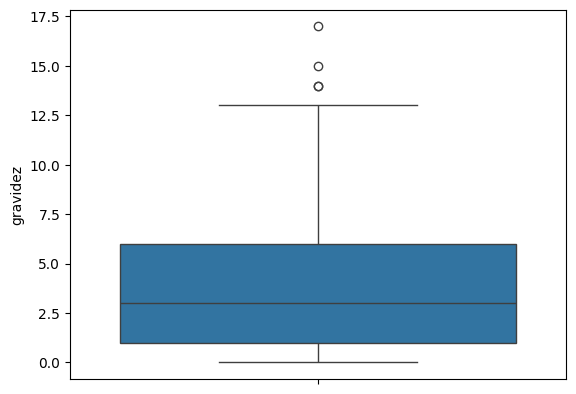

In [10]:
# Verificando outliers
sns.boxplot(df_diabetes_aed, y="gravidez")

<Axes: ylabel='glicose'>

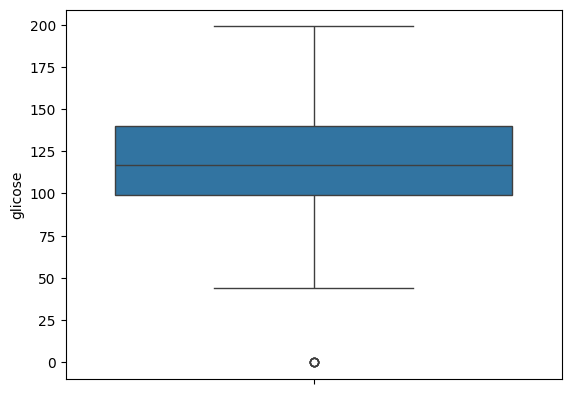

In [11]:
# Verificando outliers
sns.boxplot(df_diabetes_aed, y="glicose")

<Axes: ylabel='pressao'>

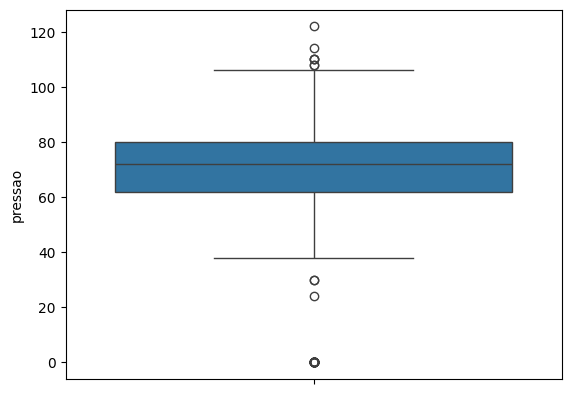

In [12]:
# Verificando outliers
sns.boxplot(df_diabetes_aed, y="pressao")

<Axes: ylabel='IMC'>

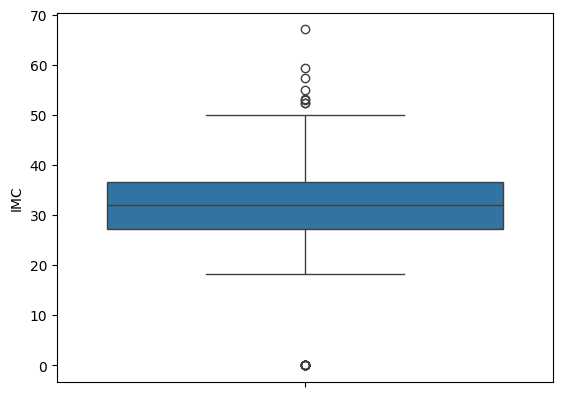

In [13]:

# Verificando outliers
sns.boxplot(df_diabetes_aed, y="IMC")

<Axes: ylabel='gravidez'>

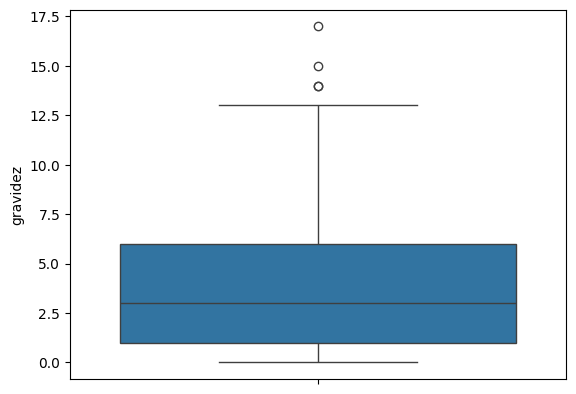

In [14]:
# Verificando outliers
sns.boxplot(df_diabetes_aed, y="gravidez")

In [15]:
# Remoção do publico com valores discrepantes
df_diabetes_aed.drop(df_diabetes_aed[df_diabetes_aed.IMC < 20].index, inplace=True)
df_diabetes_aed.drop(df_diabetes_aed[df_diabetes_aed.IMC > 50].index, inplace=True)
df_diabetes_aed.drop(df_diabetes_aed[df_diabetes_aed.pressao < 40].index, inplace=True)
df_diabetes_aed.drop(df_diabetes_aed[df_diabetes_aed.glicose < 50].index, inplace=True)
df_diabetes_aed[(df_diabetes_aed.resultado == 1) & (df_diabetes_aed.glicose > 80)].sort_values(by="glicose")

,gravidez,glicose,pressao,pele,insulina,IMC,idade,resultado
510,12,84,72,31,0,29.7,46,1
218,5,85,74,22,0,29.0,32,1
542,10,90,85,32,0,34.9,56,1
38,2,90,68,42,0,38.2,27,1
254,12,92,62,7,258,27.6,44,1
...,...,...,...,...,...,...,...,...
8,2,197,70,45,543,30.5,53,1
408,8,197,74,0,0,25.9,39,1
579,2,197,70,99,0,34.7,62,1
561,0,198,66,32,274,41.3,28,1


<Axes: xlabel='idade', ylabel='glicose'>

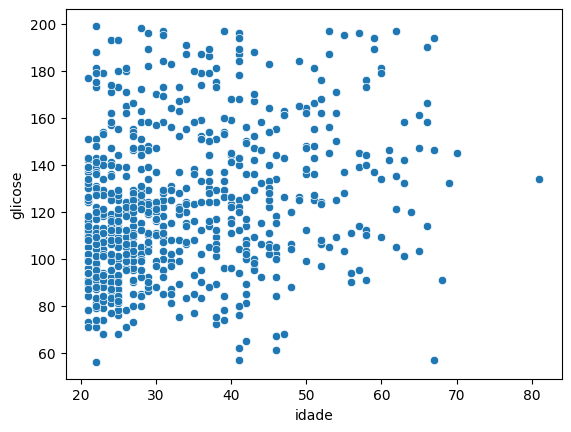

In [16]:
# Cruzamento de variaveis numericas com nivel de glicose

sns.scatterplot(df_diabetes_aed, x="idade", y="glicose")

<Axes: xlabel='pressao', ylabel='glicose'>

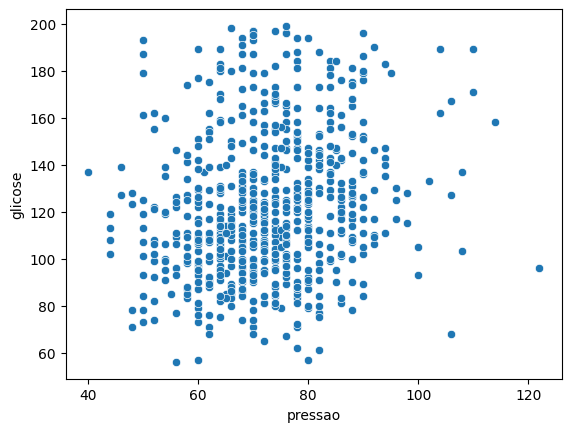

In [17]:
sns.scatterplot(df_diabetes_aed, x="pressao", y="glicose")

<Axes: xlabel='IMC', ylabel='glicose'>

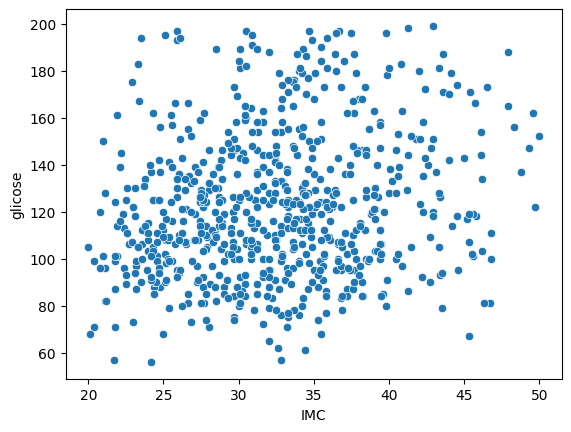

In [18]:
sns.scatterplot(df_diabetes_aed, x="IMC", y="glicose")

C:\Users\mathe\AppData\Local\Temp\ipykernel_14744\2965015831.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.catplot(data=df_diabetes_aed, x="gravidez", hue="resultado", kind="count", color="green", height=8, aspect=1.5)


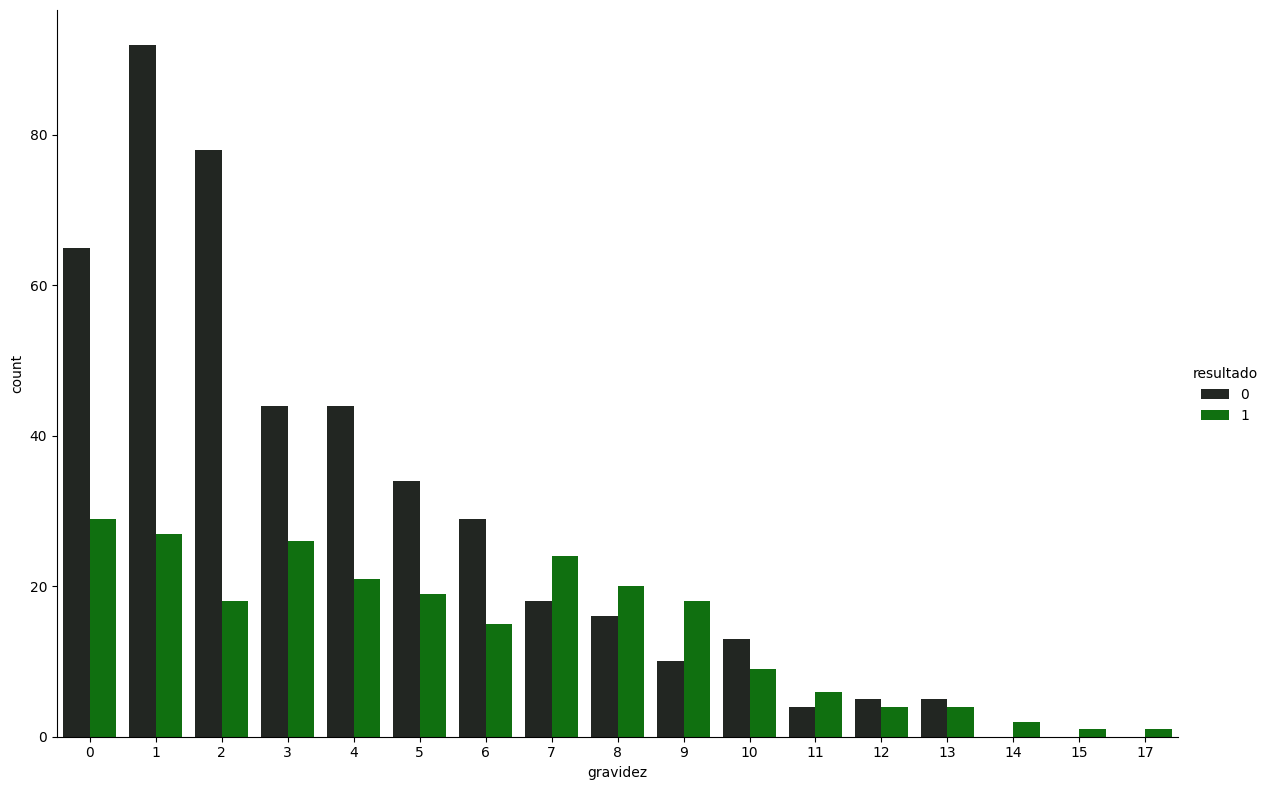

In [19]:
# Cruzamento variáveis categoricas com o resultado de diabetes

sns.catplot(data=df_diabetes_aed, x="gravidez", hue="resultado", kind="count", color="green", height=8, aspect=1.5)


<Axes: xlabel='resultado', ylabel='pressao'>

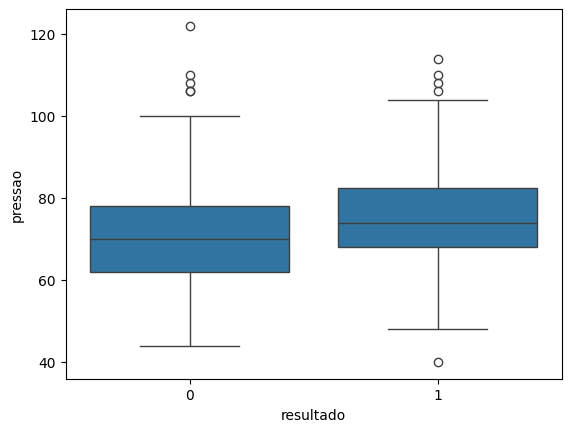

In [20]:
sns.boxplot(data=df_diabetes_aed, x="resultado",y="pressao")

<Axes: xlabel='resultado', ylabel='glicose'>

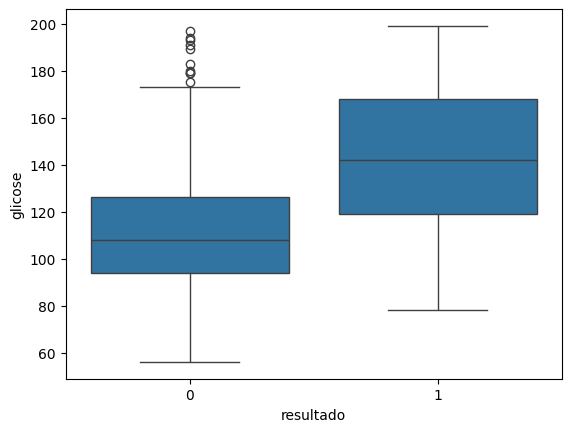

In [21]:

sns.boxplot(data=df_diabetes_aed, x="resultado",y="glicose")

<Axes: xlabel='resultado', ylabel='gravidez'>

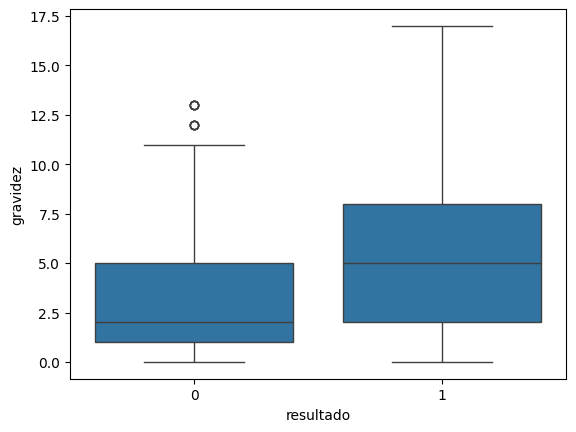

In [22]:

sns.boxplot(data=df_diabetes_aed, x="resultado",y="gravidez")

<Axes: xlabel='resultado', ylabel='insulina'>

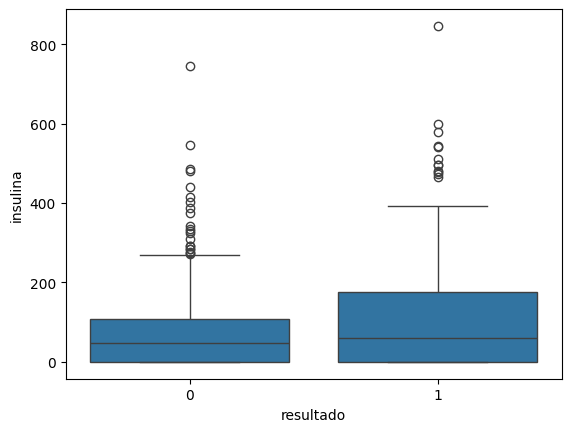

In [23]:
sns.boxplot(data=df_diabetes_aed, x="resultado",y="insulina")

<Axes: xlabel='resultado', ylabel='IMC'>

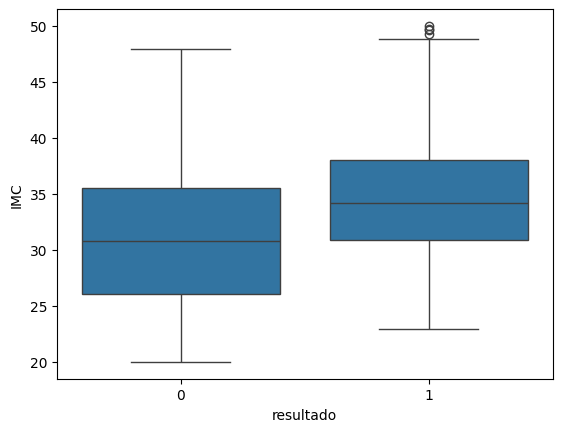

In [24]:

sns.boxplot(data=df_diabetes_aed, x="resultado",y="IMC")

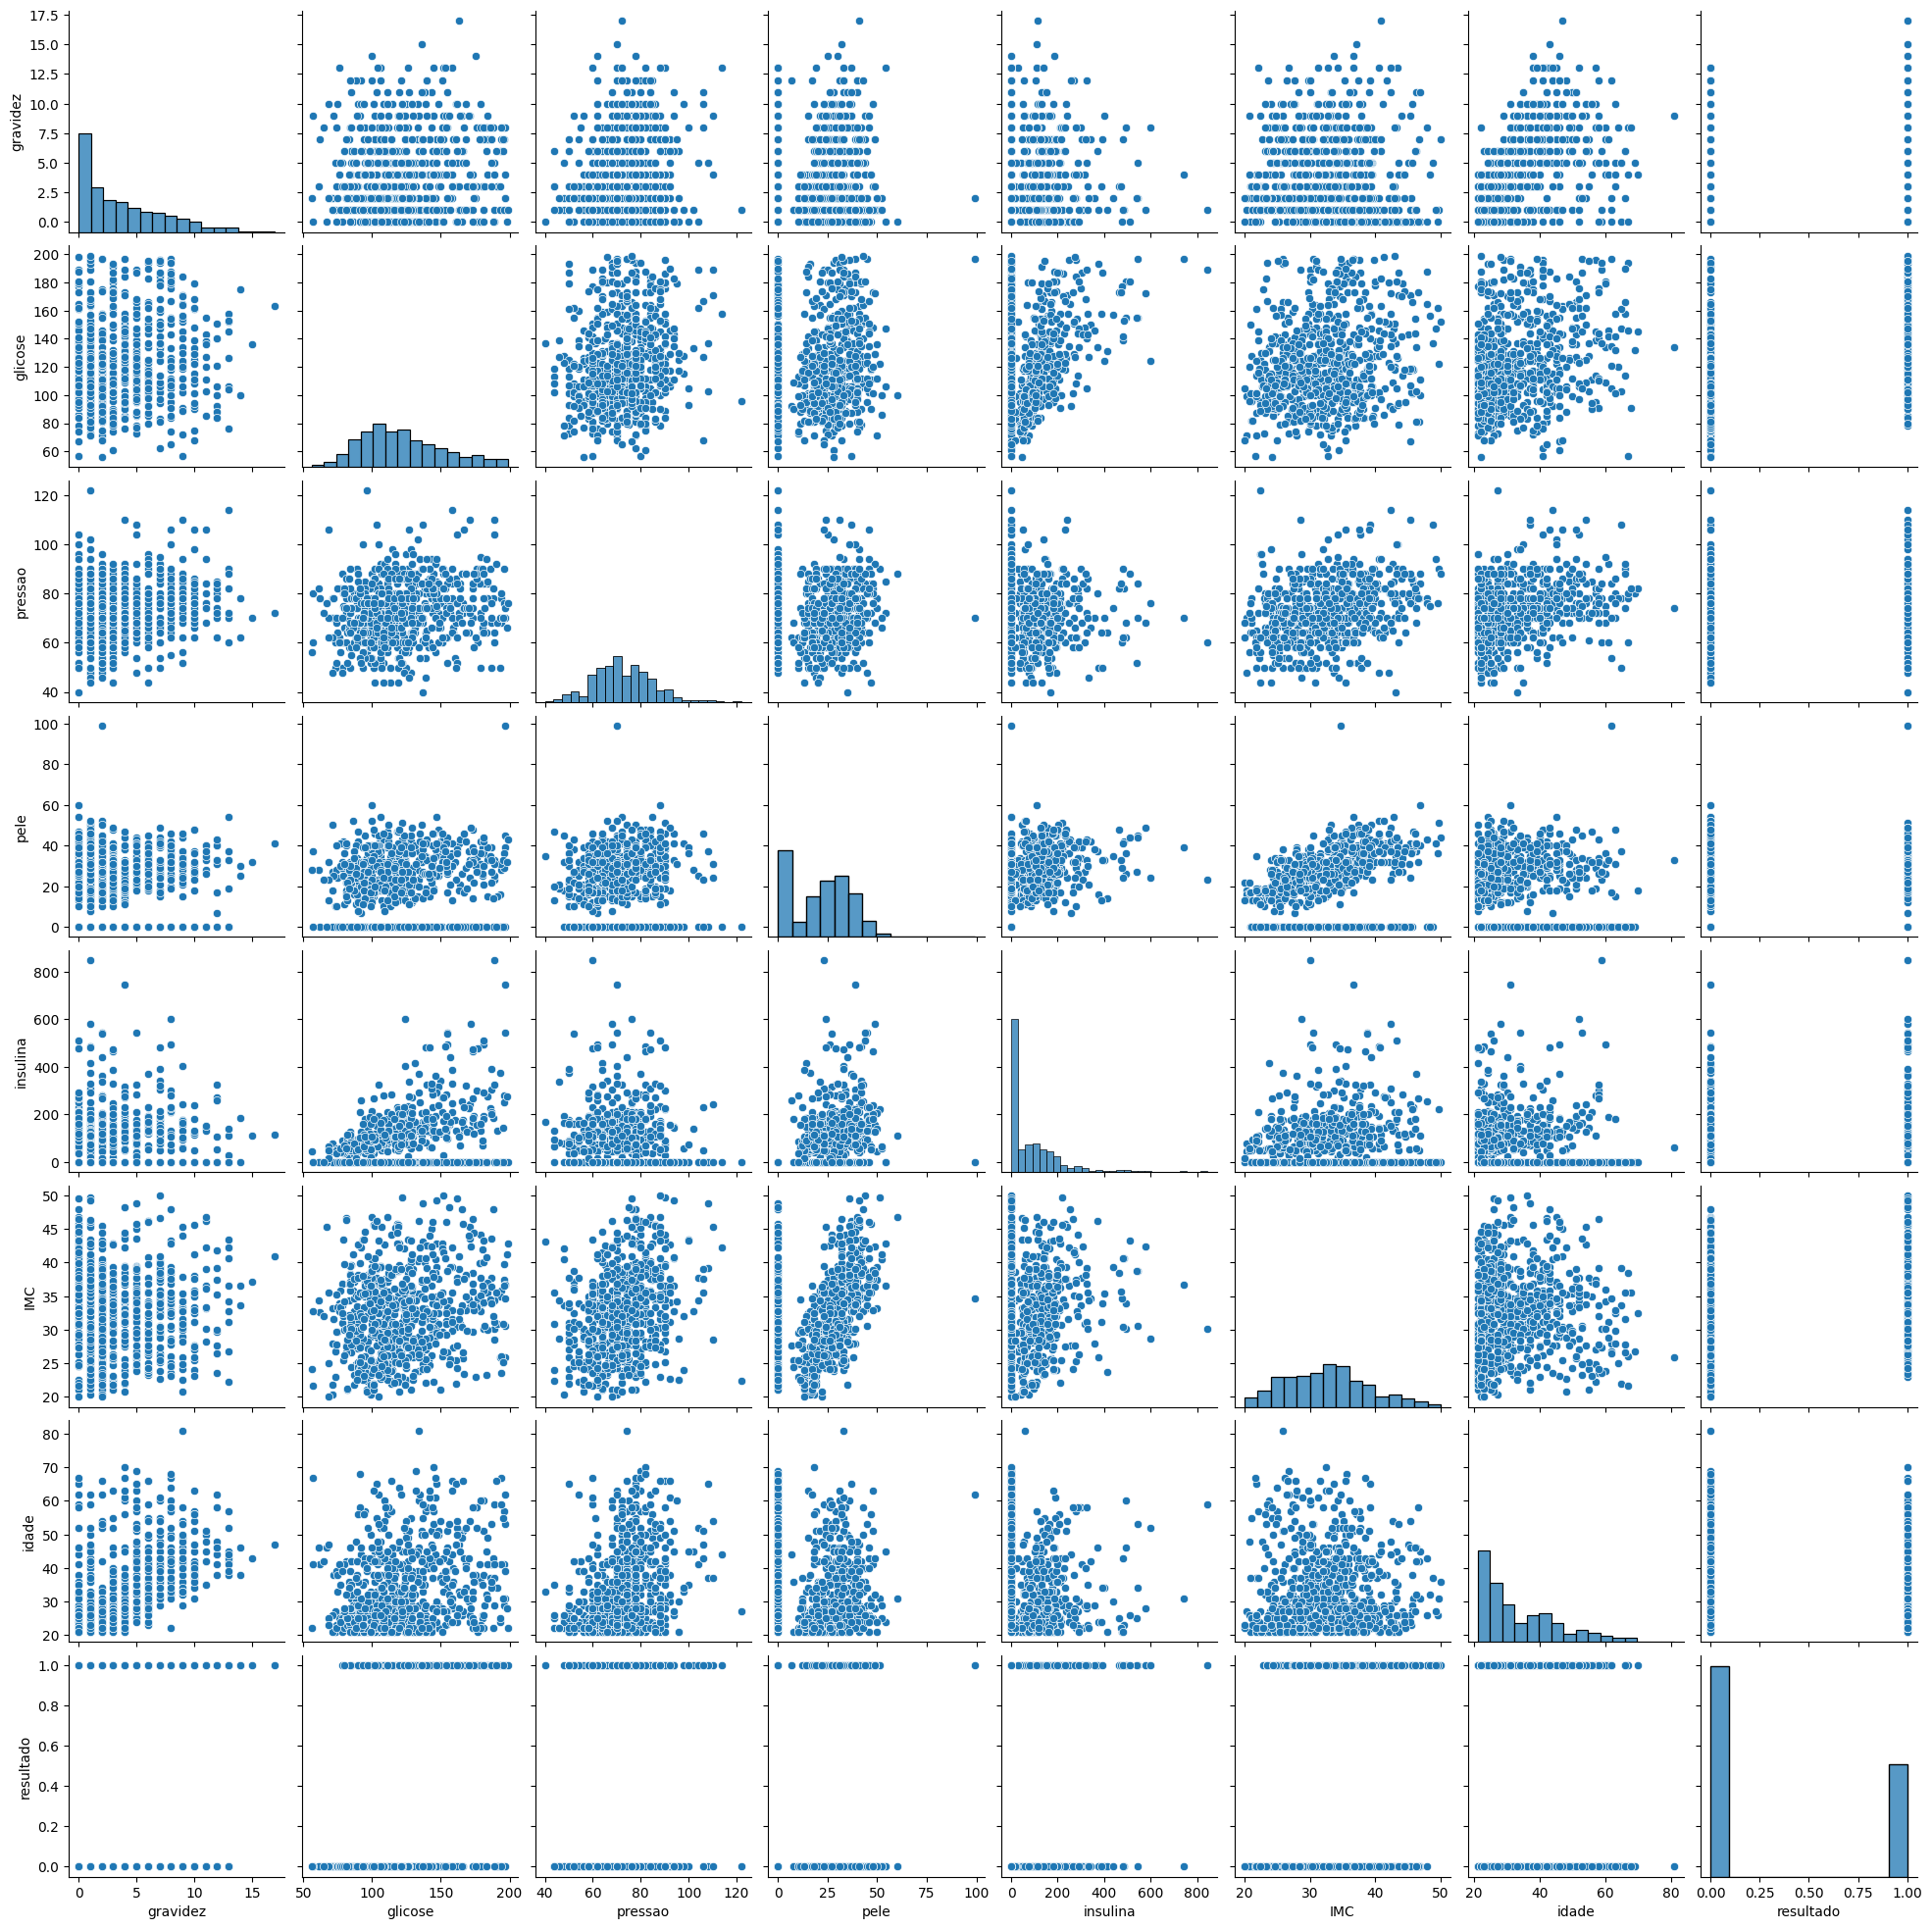

In [25]:
sns.pairplot(df_diabetes_aed)

In [26]:
# Conversão das variaveis categóricas para numéricas, usando On-hot Encoder do Pandas

df_diabetes_aed = pd.get_dummies(df_diabetes_aed, columns=["resultado"], dtype="int64")

<Axes: >

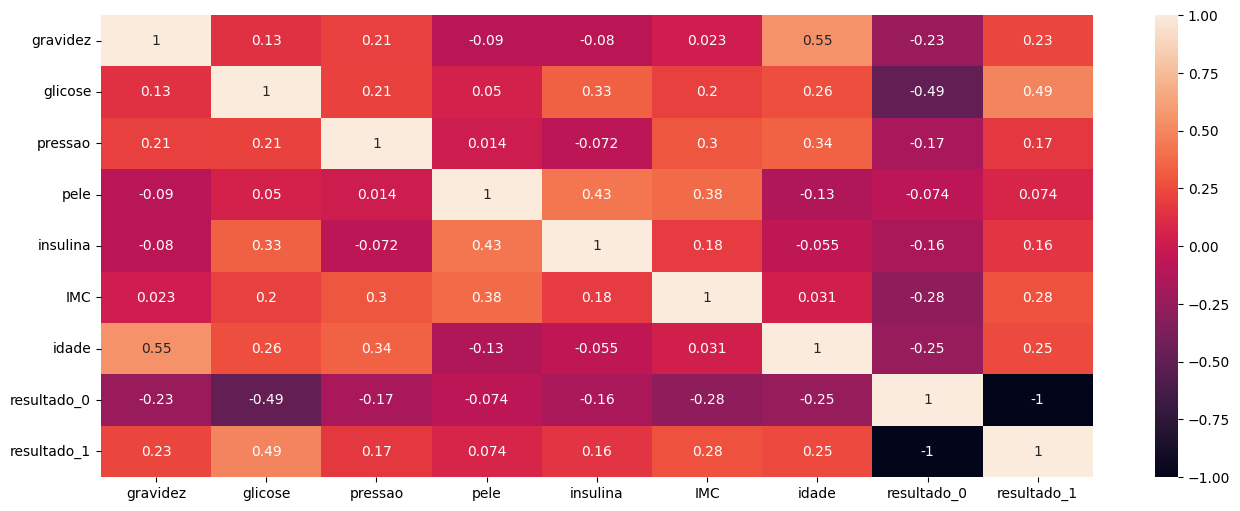

In [27]:
plt.figure(figsize=(16,6))
sns.heatmap(df_diabetes_aed.corr(), vmin=-1, vmax=1, annot=True)

# Treinamento do modelo

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

In [29]:
X = df_diabetes_aed.drop(columns=["glicose", "resultado_1", "resultado_0"], axis=1)
y = df_diabetes_aed.glicose
X

,gravidez,pressao,pele,insulina,IMC,idade
0,6,72,35,0,33.6,50
1,1,66,29,0,26.6,31
2,8,64,0,0,23.3,32
3,1,66,23,94,28.1,21
4,0,40,35,168,43.1,33
...,...,...,...,...,...,...
763,10,76,48,180,32.9,63
764,2,70,27,0,36.8,27
765,5,72,23,112,26.2,30
766,1,60,0,0,30.1,47


In [30]:
X_train, X_test, y_train, y_teste = train_test_split(X, y, test_size=0.3, random_state=51)

In [31]:
# Pipeline
model_regr = Pipeline(steps=[("scaler", StandardScaler()), ("regressor", LinearRegression())])

In [32]:
# Treinar modelo
model_regr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

# Análise de metrica

In [33]:
# Gerar predição
y_pred = model_regr.predict(X_test)

In [34]:
#Calcula o R2
r2_score(y_teste, y_pred)

0.17931349853805434

In [35]:
# Calcular MAE
mean_absolute_error(y_teste, y_pred)

np.float64(20.795303577923857)

In [36]:
# Calcula o RMSE
mean_squared_error(y_teste, y_pred, squared=False)

c:\Users\mathe\.virtualenvs\DiabetesPredictor-ML-MvRa5JGZ\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(26.88506840401023)

# Análise de residuos

In [37]:
residuos = y_teste - y_pred
residuos_std = zscore(residuos)

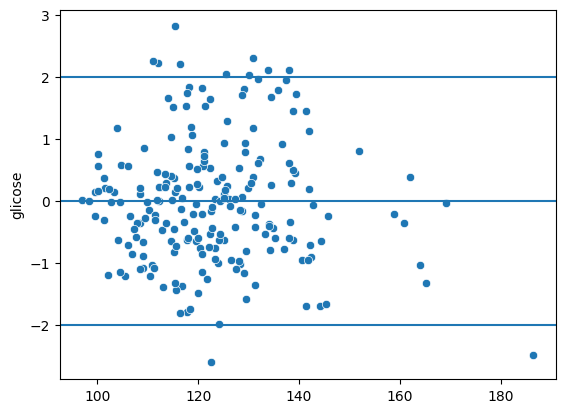

In [38]:
# Verificação da linearidade dos residuos e homocedasticidade(Valores em torno da reta)

sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=-2)
plt.axhline(y=0)
plt.axhline(y=2)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

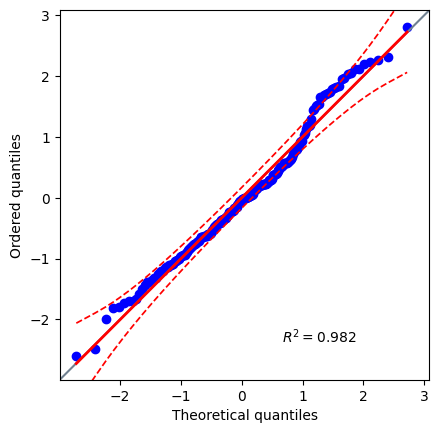

In [39]:
# Checar se os dados estão normalizados
import pingouin as pg
pg.qqplot(residuos_std, dist="norm", confidence=0.95)

In [40]:
# Teste de Homocedasticidade de Goldfeld-Quandt
from statsmodels.stats.diagnostic import het_goldfeldquandt
pipe = Pipeline(steps=[("scaler", StandardScaler())])
X_test_processed = pipe.fit_transform(X_test)
X_test_processed

array([[ 0.20195318, -0.36079762, -1.36023517, -0.78772283, -1.17915185,
        -0.3611049 ],
       [-0.9655022 ,  1.56428577,  1.9900717 ,  1.08900134,  2.71092907,
        -0.27491358],
       [-0.08991066,  0.68924787, -1.36023517, -0.78772283,  1.4798908 ,
        -0.44729623],
       ...,
       [-1.25736605, -0.71081278, -0.17777393, -0.0029109 ,  0.28168022,
        -0.96444421],
       [-0.08991066, -0.18579004, -1.36023517, -0.78772283,  0.18319716,
        -0.87825288],
       [ 0.49381703,  0.68924787,  1.07037961,  2.368586  ,  2.13644454,
         1.01795636]])

In [41]:
teste_goldfeld = het_goldfeldquandt(residuos_std, X_test_processed)
stat_goldfeld = teste_goldfeld[0]
p_value_goldfeld = teste_goldfeld[1]

In [42]:
stat_goldfeld

np.float64(0.8604421405887269)

In [43]:
p_value_goldfeld

np.float64(0.7724657546938317)

In [44]:
import joblib

joblib.dump(model_regr, "modelo_diabetes.pkl")

['modelo_diabetes.pkl']

In [48]:
predicao_individual = {
        "gravidez": 2,
        "pressao": 100,
        "pele": 120,
        "insulina": 100,
        "IMC": 23,
        "idade": 90
    }
predict_df = pd.DataFrame(predicao_individual, index=[1])

In [49]:
predict_df

,gravidez,pressao,pele,insulina,IMC,idade
1,2,100,120,100,23,90


In [50]:
model_regr.predict(predict_df)

array([134.9567129])